# Tutorial lettura oscilloscopio

In questo quaderno viene descritto come leggere l'oscilloscopio (con il maligno ⊞).

Sono stati utilizzati due pacchetti ausiliari, installati con i seguenti comandi via anaconda power shell
```
conda install -c conda-forge pyusb
conda install -c conda-forge libusb
``` 

Inoltre dopo aver scaricato **usbtmc** da [questo link](https://github.com/python-ivi/python-usbtmc)
sono andato nella cartella e dalla power shell ho scritto `py setup.py install`

Infine per installare i driver dell'oscilloscopio, ho usato [zadig](https://github.com/libusb/libusb/wiki/Windows#How_to_use_libusb_on_Windows)



## Script per la lettura
Carico quindi la libreria e cerco il dispositivo, facendomi stampare la lista di tutti i dispositivi individuabili

In [1]:
import usbtmc
print(usbtmc.list_devices())

import numpy as np
from matplotlib import pyplot as plt


[<DEVICE ID 0699:03a6 on Bus 001 Address 012>]


Creo l'oggetto passando come argomenti l'*indirizzo del venditore* e l'*ID del modello* appena individuati (N.B. sono numeri esadecimali)

In [2]:
dev =  usbtmc.Instrument(0x0699, 0x03a6)

In [3]:
print(dev.ask("*IDN?"))

TEKTRONIX,TDS 2024C,C045427,CF:91.1CT FV:v24.26


Definisco quindi due routine:
1. `acquisisciChan` routine per effettuare la lettura di un dato canale specificato come argomento. Il primo canale è il numero 1 (non 0...)
2. `acquisisciTot` routine per la lettura di tutti i canali; viene anche salvato il file, unico argomento richiesto. Infine viene anche effettuato il plot

In [4]:
def acquisisciTot(filePath):
    plt.close("all")
    
    print(dev.ask("*IDN?"))
    dev.write("DATA:ENC ASCII\n")
    dev.write("DATA:WIDTH 1\n")
    dev.write("DATA:START 1\n")
    dev.write("DATA:STOP 2500\n")

    # Leggo i due canali
    _, _, d1, dict1 = acquisisciChan(1)
    _, _, d2, dict2 = acquisisciChan(2)
    
    dev.write("ACQ:STATE RUN\n")
    
    
    
    # Ottengo le 5 info
    xincr = float(dict1["XINCR"])
    yoff1 = float(dict1["YOFF"])
    yoff2 = float(dict2["YOFF"])
    ymult1 = float(dict1["YMULT"])
    ymult2 = float(dict2["YMULT"])
    
    
    
    # Costruisco i vettori con i dati
    time = np.linspace(0.5, 2500.5, 2500) * xincr
    v1 = (d1 - yoff1) * ymult1
    v2= (d2 - yoff2) * ymult2 
    
    
    
    # Preparo i dati da salvare
    matrice = np.concatenate((time[:,np.newaxis], v1[:,np.newaxis], v2[:,np.newaxis], ), axis = 1)
    np.savetxt(filePath, matrice, delimiter = ",")
    
    print("Dati salvati")
    
    
    
    # Plotto
    fig, ax = plt.subplots()
    ax.plot(time, v1, label = "Ch 1")
    ax.plot(time, v2, label = "Ch 2")
    
    ax.legend(fontsize = 14)
    ax.set_xlabel("Tempo (s)", fontsize = 14)
    ax.set_ylabel("Ampiezza (V)", fontsize = 14)
    ax.set_title("Plot", fontsize = 16)
    ax.grid(True)
    
    plt.show()
    
    
    print("Finito")
   

def acquisisciChan(i):
    print(f"Sto per acquisire il canale {i}")
    dev.write(f"SEL:CH{i} ON\n")
    dev.write("DATA:ENC ASCII\n")
    dev.write(f"DATA:SOURCE CH{i}\n")
    dev.write("VERBOSE ON\n")
    dev.ask("DATA:START?\n")
    dev.ask("DATA:STOP?\n")
    preambolo = dev.ask("WFMPRE?\n")
    print(preambolo)
    dev.write("ACQ:STATE STOP\n")
    datiraw = dev.ask("CURVE?\n")
    print(datiraw)
    

    # Processo il preambolo
    tmpDict = dict(i.split(" ",1) for i in preambolo.split(";"))
    
    # processo i dati
    dati = np.array(datiraw[6:].split(","), dtype = float)

    
    return(datiraw, preambolo, dati, tmpDict)




Vado a chiamare la routine che effettua l'acquisizione, specificando in quale file salvare i dati

TEKTRONIX,TDS 2024C,C045427,CF:91.1CT FV:v24.26
Sto per acquisire il canale 1
:WFMPRE:BYT_NR 1;BIT_NR 8;ENCDG ASC;BN_FMT RP;BYT_OR MSB;NR_PT 2500;WFID "Ch1, DC coupling, 2.0E0 V/div, 2.5E-4 s/div, 2500 points, Average mode";PT_FMT Y;XINCR 1.0E-6;PT_OFF 0;XZERO -1.25E-3;XUNIT "s";YMULT 8.0E-2;YZERO 0.0E0;YOFF 2.1E1;YUNIT "Volts"
:CURVE 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,19,33,40,43,43,43,43,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,

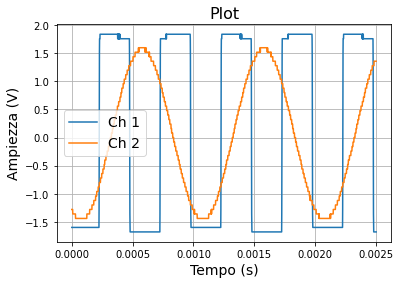

Finito


In [5]:
acquisisciTot(r".\ffile.txt")